<a href="https://colab.research.google.com/github/JoanwaMaina/Classification-Model/blob/main/Customer_Churn_Predictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Understanding**

**Problem Statement**

SyriaTel, a teleommunication company, is experiencing high customer churn rates, which negatively impact revenue and market position.

Retaining customers is more cost-effective than acquiring new ones, making it crucial for SyriaTel to address this issue.

To mitigate churn, the company needs a reliable predictive model that can identify customers likely to leave. This model will enable SyriaTel to implement targeted retention strategies, reducing churn rates.

**Objectives**

The goal is to build a predictive model to identify which customers would churn.

Predicting churn is crucial for SyriaTel to protect revenue, maximize customer lifetime value, and implement tailored retention strategies.

The model will be specifically aim to:
*   Identify the main factors that lead to customer churn.
*   Uncover customer behavior patterns leading up to churn events.
*   Accurately predict which customers are at risk of churning.

**Measures of success:**

The model's success will be evaluated based on the recall and AUC scores, ensuring accurate churn predictions and effective retention efforts.
A target recall score of 0.8 will be used as the success measure.







**Data Understanding**








In [ ]:
# Import libraries

# Data manipulation
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




In [ ]:
# Data loading

df = pd.read_csv("/content/Telecom churn data.zip")

In [ ]:
#Checking the first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False


In [ ]:
#Checking the last five rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.20,77,26.55,...,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.10,57,39.29,...,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.80,109,30.74,...,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.80,105,36.35,...,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.40,113,39.85,...,82,22.60,241.40,77,10.86,13.70,4,3.70,0,False


In [ ]:
#Shape of the dataframe
print("The number of rows: {}".format(df.shape[0]))

print("The number of columns:{}".format(df.shape[1]))

The number of rows: 3333
The number of columns:21


In [ ]:
# Looking at the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

**Column description**

**Account_length**:The duration of time in days that the customer has been using the service.

 **Area_code**: Numerical code used to identify specific geographic regions within Syria

 **Phone_number**: The phone number associated with each customer's account.

 **International_plan**: Whether the customer has an international calling plan or not

**Voice_Mail_Plan**:Whether the customer has a voicemail service activated or not

**Number_Vmail_Messages**: The number of voicemail messages received by the customer.

**Total_Day_Minutes**: The total number of minutes the customer used during the day.

**Total_Day_Calls**: The total number of calls made by the customer during the day.

**Total_Day_Charge**: The total charges incurred by the customer for day calls.

**Total_Eve_Minutes**: The total number of minutes the customer used during the evening.

**Total_Eve_Calls**: The total number of calls made by the customer during the evening.

**Total_Eve_Charge**: The total charges incurred by the customer for evening calls.

**Total_Night_Minutes**: The total number of minutes the customer used during the night.

**Total_Night_Calls**: The total number of calls made by the customer during the night.

**Total_Night_Charge**: The total charges incurred by the customer for night calls.

**Total_Intl_Minutes**: The total number of international minutes used by the customer.

**Total_Intl_Calls**: The total number of international calls made by the customer.

**Total_Intl_Charge**: The total charges incurred by the customer for international calls.

**Customer_Service_Calls**: The number of customer service calls made by the customer.

**Churn**: Whether the customer churned (cancelled service) or not, usually represented as "Yes" or "No".

In [ ]:
# An overview of the structure and characteristics of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
#check decriptive stats
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


**DATA CLEANING**

In [ ]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in this dataset.

In [ ]:
# Cleaning up column headings for easier data manipulation
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

This adjustment standardizes the column names and make them easier to work with.


On isnpection of data types, the area code is shown as an integer.
However the values are descriptive. I therefore convert them to an object for improved data integrity.

In [ ]:
#converting 'area_code' datatype
df["area_code"] = df["area_code"].astype(object)
df.info() #checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [ ]:
#Dropping the 'state' column
# We can use the area code to locate the customers so we drop this column
df = df.drop('state', axis=1)

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# checking that each customer has got a single number
df['phone_number'].nunique()

3333

In [ ]:
# dropping the phone  number column
df = df.drop('phone_number', axis=1)

Now that the data frame is ready for exploratory analysis

**EXPLORATORY DATA ANALYSIS**

In this section I did Univariate and Bivariate anylisis.

The univariate analysis is a look at the individual columns to look at


*   Central tendencies measures
*   Dispersion
*   Distribution of the data and check for outliers

I will be looking at the categorical values and numerical values separately

In [ ]:
# Distribution of categorical values
categorical_columns = df[["international_plan", "voice_mail_plan", "churn"]]
# for col in categorical_columns:
#     value_counts = df[col].value_counts()
#     print(f"Value counts for '{col}':")
#     print(value_counts.values.flatten())
#     print()

for col in categorical_columns:
    value_counts = df[col].value_counts()
    flattened = ', '.join([f"{index}: {count}" for index, count in value_counts.items()])
    print(f"{col}: {flattened}\n")

international_plan: no: 3010, yes: 323

voice_mail_plan: no: 2411, yes: 922

churn: False: 2850, True: 483



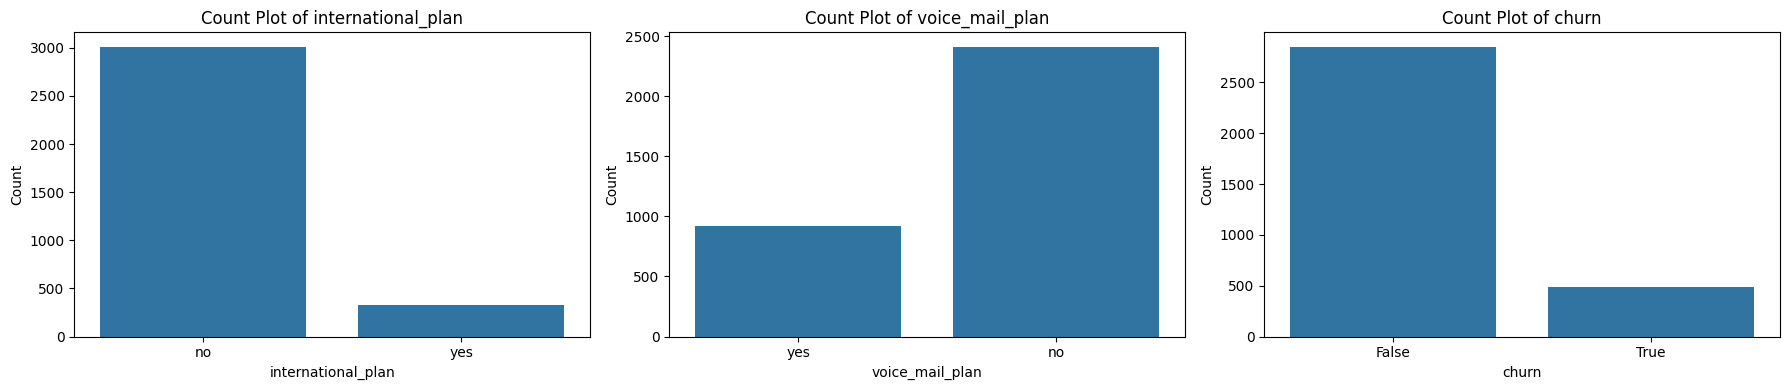

In [ ]:
# visualizing the distribution of categorical values
categorical_columns = ['international_plan', 'voice_mail_plan', 'churn']
num_columns = len(categorical_columns)

# Create subplots
fig, axes = plt.subplots(1, num_columns, figsize=(6 * num_columns, 4))

for i, col in enumerate(categorical_columns):
    # Plot count plot
    sns.countplot(data=df, x=col, ax=axes[i])

    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating the churn rate
# ChurnRate = (Number of Churned Customers / Total Number of Customers)

churn_rate = (df['churn'].sum() / len(df)) * 100

print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 14.49%


14.49% of customers who signed up left.
That is, 483 out of the 3,333 terminated their contract.

The distribution shows a data imbalance. This needs to be addressed before modeling as it could cause the model to make false predictions.

In [ ]:
# Summary of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
summary_data = []

for col in numerical_columns:
    summary_data.append({
        'Feature': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode()[0],
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Range': df[col].max() - df[col].min(),
    })

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Feature', inplace=True)  # Set 'Feature' column as index
print(summary_df)

                         Mean  Median   Mode   Min    Max  Range
Feature                                                         
account_length         101.06  101.00 105.00  1.00 243.00 242.00
number_vmail_messages    8.10    0.00   0.00  0.00  51.00  51.00
total_day_minutes      179.78  179.40 154.00  0.00 350.80 350.80
total_day_calls        100.44  101.00 102.00  0.00 165.00 165.00
total_day_charge        30.56   30.50  26.18  0.00  59.64  59.64
total_eve_minutes      200.98  201.40 169.90  0.00 363.70 363.70
total_eve_calls        100.11  100.00 105.00  0.00 170.00 170.00
total_eve_charge        17.08   17.12  14.25  0.00  30.91  30.91
total_night_minutes    200.87  201.20 188.20 23.20 395.00 371.80
total_night_calls      100.11  100.00 105.00 33.00 175.00 142.00
total_night_charge       9.04    9.05   9.45  1.04  17.77  16.73
total_intl_minutes      10.24   10.30  10.00  0.00  20.00  20.00
total_intl_calls         4.48    4.00   3.00  0.00  20.00  20.00
total_intl_charge        

This provides an overview of the metrics per specific feature.

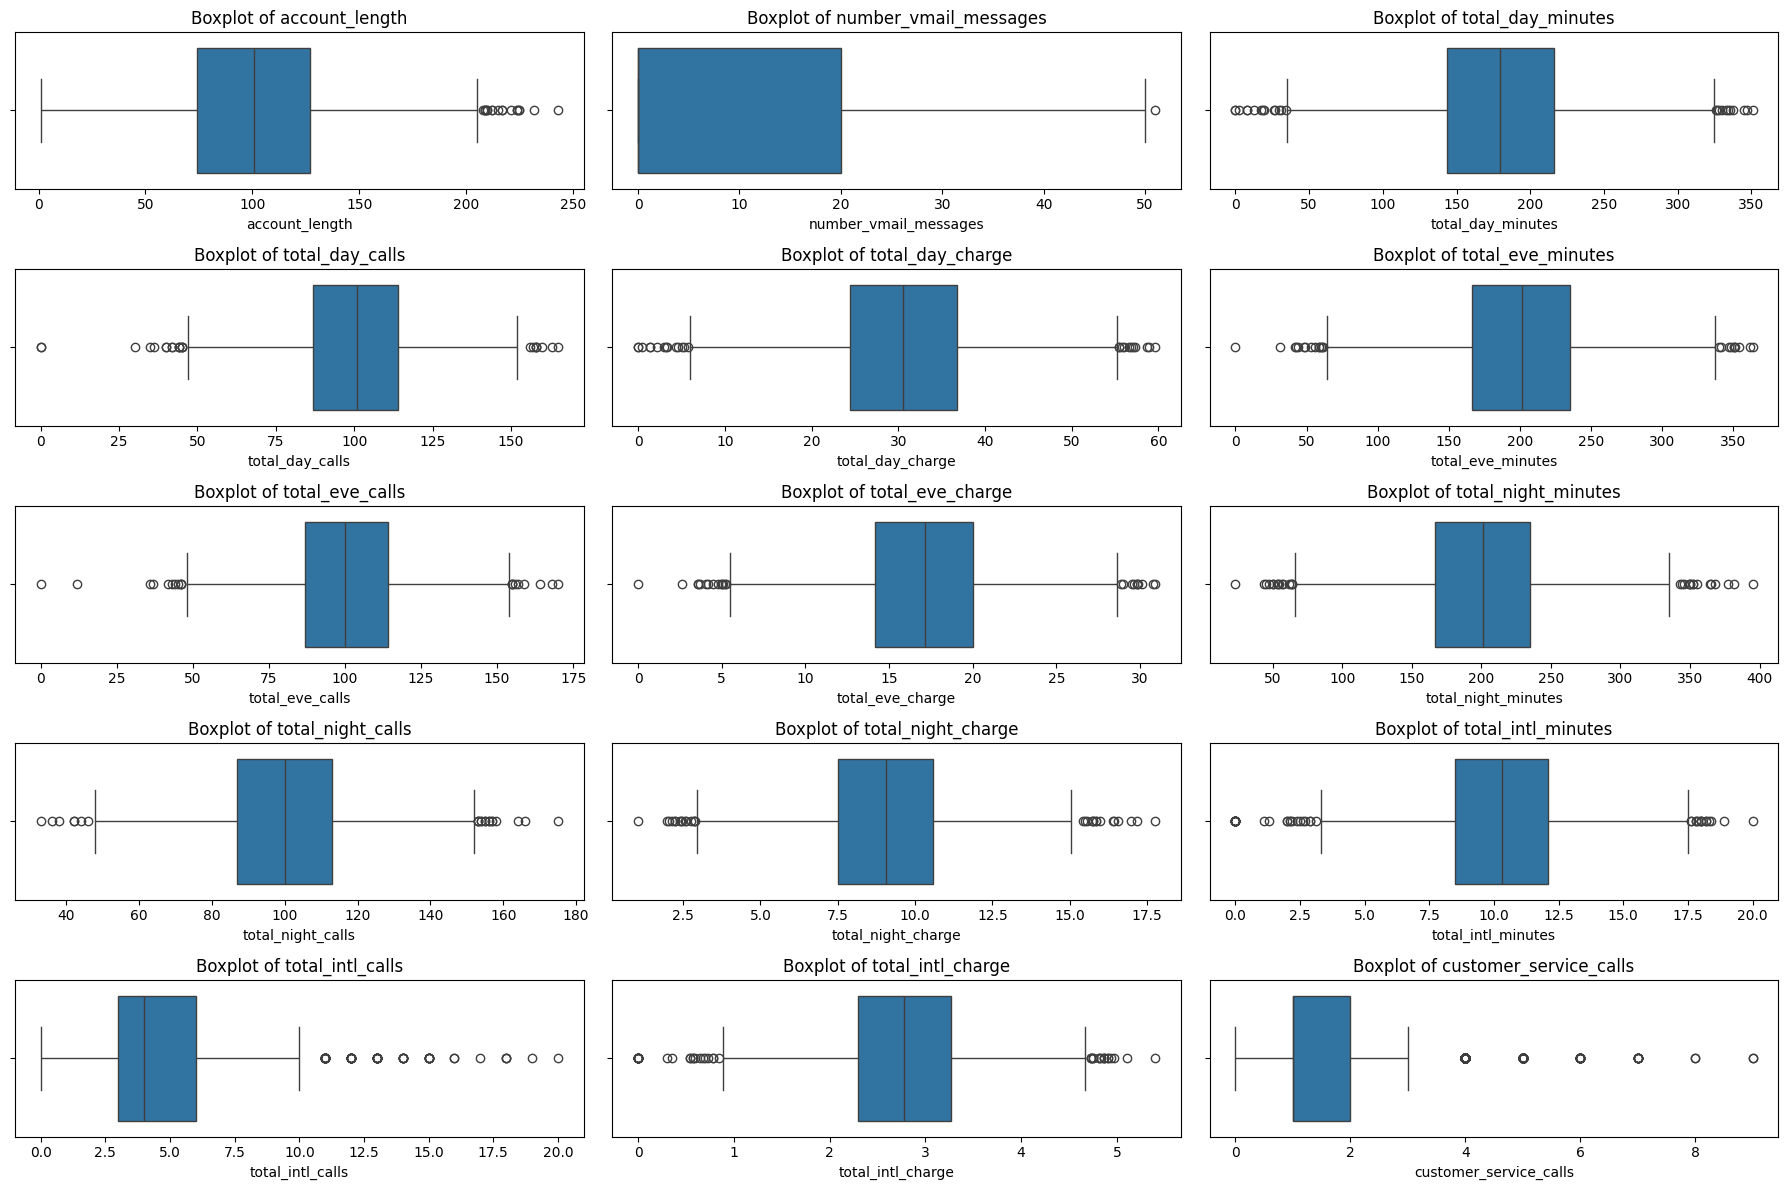

In [ ]:
# Distribution of data in the numerical columns
numerical_df = df.select_dtypes(include=['int', 'float'])

# Calculate the number of columns and rows needed for subplots
num_columns = len(numerical_df.columns)
num_rows = (num_columns + 2) // 5  # Round up division to ensure enough space for all columns

# Create subplots with five rows and multiple columns
fig, axes = plt.subplots(5, num_rows, figsize=(6*num_rows, 12))
axes = axes.flatten()  # Flatten axes to simplify indexing

# Plotting boxplots for each numerical column with outliers horizontally
for i, column in enumerate(numerical_df.columns):
    ax = axes[i]
    sns.boxplot(x=numerical_df[column], ax=ax, orient='h')  # horizontal boxplot
    ax.set_title(f'Boxplot of {column}')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()


It is clear there are distinct outliers in these columns: total international calls, customer service calls, voicemail and account length.

Next we look at the actual outlier values per column.

In [ ]:
#checing for outliers using the IQR method

# Function to identify outliers using IQR
def identify_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column_data[(column_data < lower_bound) | (column_data > upper_bound)]

# Identify outliers for each numerical column
outliers = {column: identify_outliers(numerical_df[column]) for column in numerical_df.columns}

# Display outliers for each numerical column horizontally
for column, outliers_df in outliers.items():
    print(f"Outliers for '{column}':")
    print(outliers_df.values.flatten())
    print()

Outliers for 'account_length':
[208 215 209 224 243 217 210 212 232 225 225 224 212 210 217 209 221 209]

Outliers for 'number_vmail_messages':
[51]

Outliers for 'total_day_minutes':
[332.9 337.4 326.5 350.8 335.5  30.9  34.  334.3 346.8  12.5  25.9   0.
   0.   19.5 329.8   7.9 328.1  27.   17.6 326.3 345.3   2.6   7.8  18.9
  29.9]

Outliers for 'total_day_calls':
[158 163  36  40 158 165  30  42   0  45   0  45 160 156  35  42 158 157
  45  44  44  44  40]

Outliers for 'total_day_charge':
[56.59 57.36 55.51 59.64 57.04  5.25  5.78 56.83 58.96  2.13  4.4   0.
  0.    3.32 56.07  1.34 55.78  4.59  2.99 55.47 58.7   0.44  1.33  3.21
  5.08]

Outliers for 'total_eve_minutes':
[ 61.9 348.5 351.6  31.2 350.5  42.2 347.3  58.9  43.9  52.9  42.5  60.8
  58.6  56.   48.1  60.  350.9  49.2 339.9 361.8 354.2 363.7   0.  341.3]

Outliers for 'total_eve_calls':
[164  46 168  42  37  12 157 155  45  36 156  46  44 155  46  43   0 155
 159 170]

Outliers for 'total_eve_charge':
[ 5.26 29.62 29.8

**Dealing with outliers**

Dropping all the outliers may lead to a loss of valuable information, especially since the outliers are genuine observations.

We only replace the outlier in the voicemail column.
It is only a single extreme entry.
This could be an error in entry given a mean of 8 and a 75 quantile of 20.



In [ ]:
# Select the "number_vmail_messages" column
voicemail_column = numerical_df['number_vmail_messages']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = voicemail_column.quantile(0.25)
Q3 = voicemail_column.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median)
median_value = voicemail_column.median()
number_vmail_messages_cleaned = voicemail_column.apply(lambda x: x if lower_bound <= x <= upper_bound else median_value)

# Update the "voicemail" column in the original DataFrame
df['number_vmail_messages'] = number_vmail_messages_cleaned

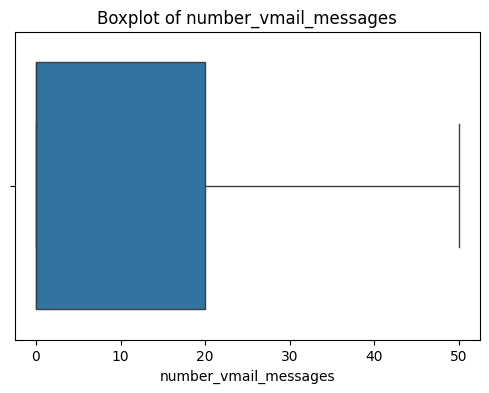

In [ ]:
# reinspecting the number_vmail_messages column for outiers
# Plot box plot for number_vmail_messages column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['number_vmail_messages'])
plt.title('Boxplot of number_vmail_messages')
plt.show()

**BIVARIATE AND MULTIVARIATE ANALYSIS**

In this section, I explored the following questions:

•	How do call charges affect churn?

•	How long do customers stay before they unsubscribe?

•	What are the churn levels across subscription plans?

•	Is calling customer service a sign of customer dissatisaction/potential churn?

•	Are customers in certain areas more likely to churn?


**Exploring charges versus churn**

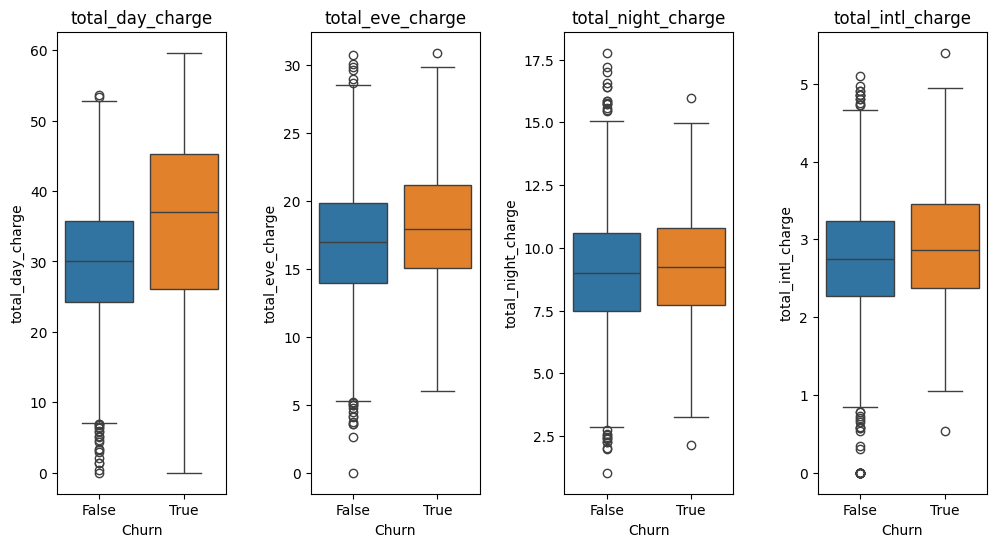

In [ ]:
# Charges against churn
charges = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))
for idx, feat in enumerate(charges):
    ax = axes[idx]
    sns.boxplot(x="churn", y=feat, hue="churn", data=df, ax=ax, legend=False)
    ax.set_xlabel("Churn")
    ax.set_ylabel(feat)
    ax.set_title(feat)  # Set the plot title as the column name

# Adjust layout and add space between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

It is clear that total day charge has the greatest discrepancy in distribution between churn and non churn.More customers resulted to discontinuing their subscription.

This could be due to a  higher total charge, dissatisfaction with the service or competition which led customers to switch to other service providers.


**Exploring account length versus churn**

Will help to understand how the duration of an account's existence relates to the likelihood of churn, where churn refers to customers discontinuing their services with the company.

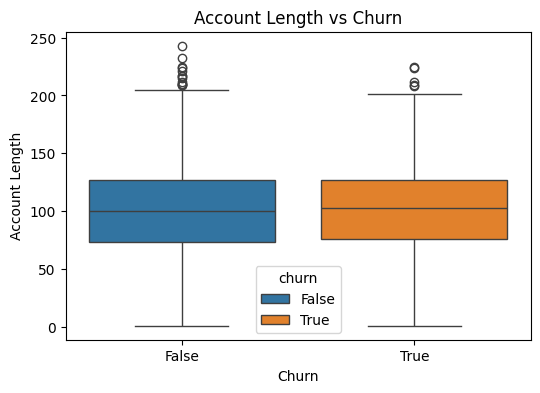

In [ ]:
#Box plot to visualise account length against churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='account_length',hue="churn", data=df)
plt.title('Account Length vs Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.show()

There is an  equal proportion of churned and non-churned customers across different account lengths.

This indicates that there isn't a strong relationship between account length and churn. The length of time a customer has been with the service may not be a significant factor influencing churn behavior.

**Examining the account lengths for churned customers**


In [ ]:
# Filter churned customers
churned_customers = df[df['churn'] == 1]

# Calculate summary statistics
mean_account_length = churned_customers['account_length'].mean()
median_account_length = churned_customers['account_length'].median()
std_account_length = churned_customers['account_length'].std()
min_account_length = churned_customers['account_length'].min()
max_account_length = churned_customers['account_length'].max()

# Print the summary statistics
print("Summary statistics of account lengths for churned customers:")
print("Mean:", mean_account_length)
print("Median:", median_account_length)
print("Standard Deviation:", std_account_length)
print("Minimum:", min_account_length)
print("Maximum:", max_account_length)

Summary statistics of account lengths for churned customers:
Mean: 102.66459627329192
Median: 103.0
Standard Deviation: 39.46782040739152
Minimum: 1
Maximum: 225


We see that on average a customer stays for 102 days.

The longest a customer has stayed with the service provider before leaving is 225 days.

Measures need to be put in place to help increase customer retention, foster long-term relationships, and maximize customer lifetime value.

In [ ]:
# Filter churned customers
non_churned_customers = df[df['churn'] == 0]

# Calculate summary statistics
mean_account_length_non_churned = non_churned_customers['account_length'].mean()
median_account_length_non_churned = non_churned_customers['account_length'].median()
std_account_length_non_churned = non_churned_customers['account_length'].std()
min_account_length_non_churned = non_churned_customers['account_length'].min()
max_account_length_non_churned = non_churned_customers['account_length'].max()

# Print the summary statistics
print("Summary statistics of account lengths for non-churned customers:")
print("Mean:", mean_account_length_non_churned)
print("Median:", median_account_length_non_churned)
print("Standard Deviation:", std_account_length_non_churned)
print("Minimum:", min_account_length_non_churned)
print("Maximum:", max_account_length_non_churned)

Summary statistics of account lengths for non-churned customers:
Mean: 100.79368421052632
Median: 100.0
Standard Deviation: 39.88235017521783
Minimum: 1
Maximum: 243


The longest a customer has been a subscriber is 243 days.
The average period is 100 days. This acts as a baseline indicator of loyalty.

**Exploring subscription plan against churn**

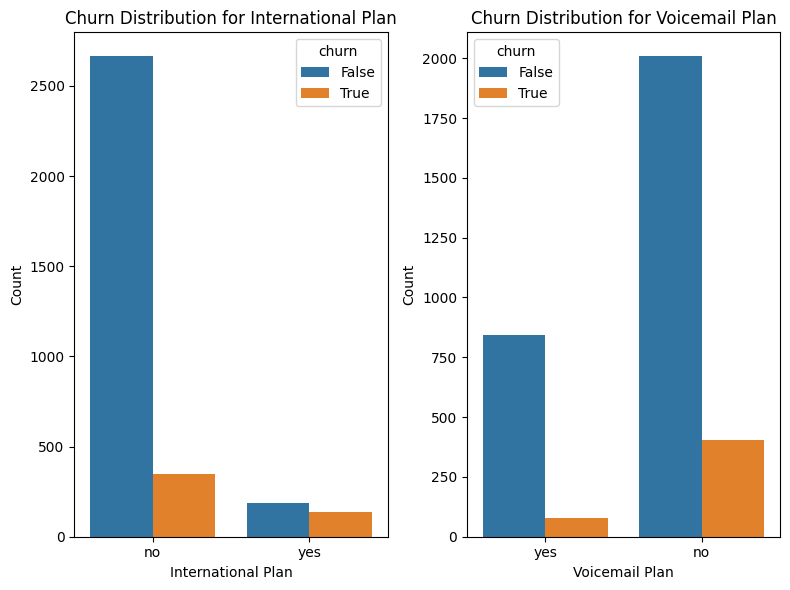

In [ ]:
# Subplot for subscription plans
plt.figure(figsize=(8, 6))

# Subplot for 'International' plan
plt.subplot(1, 2, 1)
sns.countplot(x='international_plan', hue='churn', data=df)
plt.title('Churn Distribution for International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')

# Subplot for 'Voicemail' plan
plt.subplot(1, 2, 2)
sns.countplot(x='voice_mail_plan', hue='churn', data=df)
plt.title('Churn Distribution for Voicemail Plan')
plt.xlabel('Voicemail Plan')
plt.ylabel('Count')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

Customers who had subscribed to the international plan have a lower number of churned cases than who had not subscribed.
This could be indicative of satisfaction of international call plan subscribers with the service.

Churn rates are lower among customers with a voicemail plan than those without.
This indicates that the voicemail plan is a feature that could be advocated for as a retention tool for customers.



**Exploring churn by customer service calls**


In [ ]:
# Create a cross-tabulation of customer_service_calls and churn
churn_distribution = pd.crosstab(df['customer_service_calls'], df['churn'])

# Display the cross-tabulation
print(churn_distribution)


churn                   False  True 
customer_service_calls              
0                         605     92
1                        1059    122
2                         672     87
3                         385     44
4                          90     76
5                          26     40
6                           8     14
7                           4      5
8                           1      1
9                           0      2


This shows the various points at which customers left the company based on the calls they made.

The highest number of customers who churned was at the first call.
This could be an indicator of dissatisfaction that was not adressed during that fast call.

The trend is lesser rates of attritions as more calls are made.

Customer service calls therefore is crucial in managing customer retention

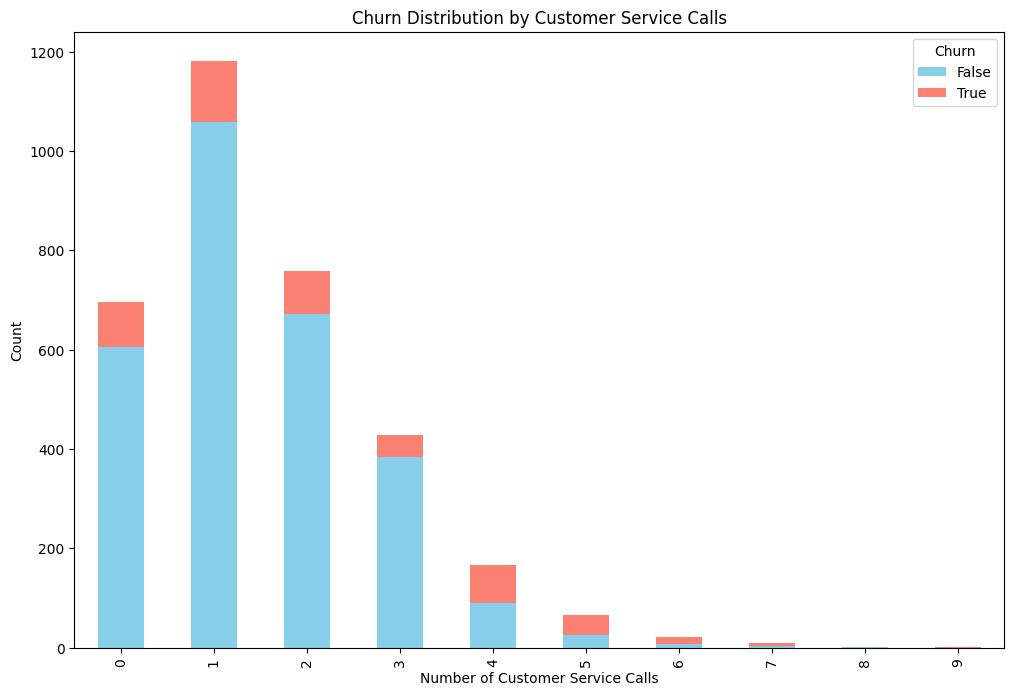

In [ ]:
churn_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'salmon'])

# Adding titles and labels
plt.title('Churn Distribution by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Display the plot
plt.show()

**Distribution of churn among area codes**

In [ ]:
df['area_code'].unique()


array([415, 408, 510], dtype=object)

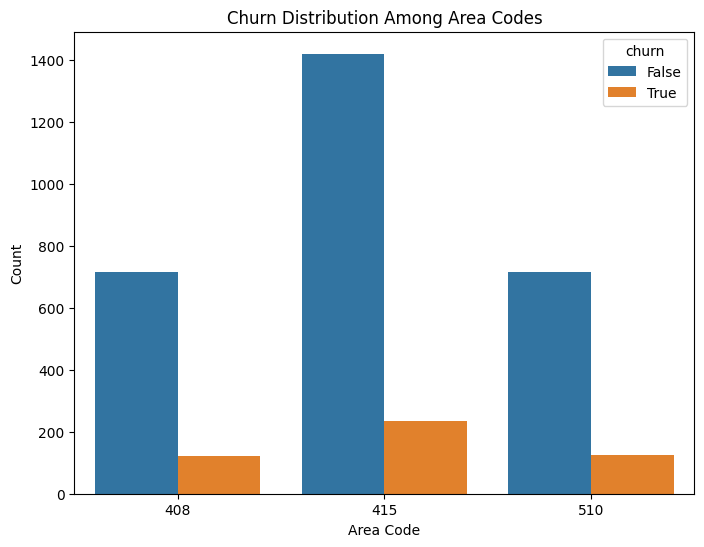

In [ ]:
#Distribution of churn among area codes
# Create a count plot for churn distribution among area codes
plt.figure(figsize=(8, 6))
sns.countplot(x='area_code', hue='churn', data=df)
plt.title('Churn Distribution Among Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

Area code 415 has the highest churn rate.

Next i explored the customer service call numbers among the areas and its relation to churn

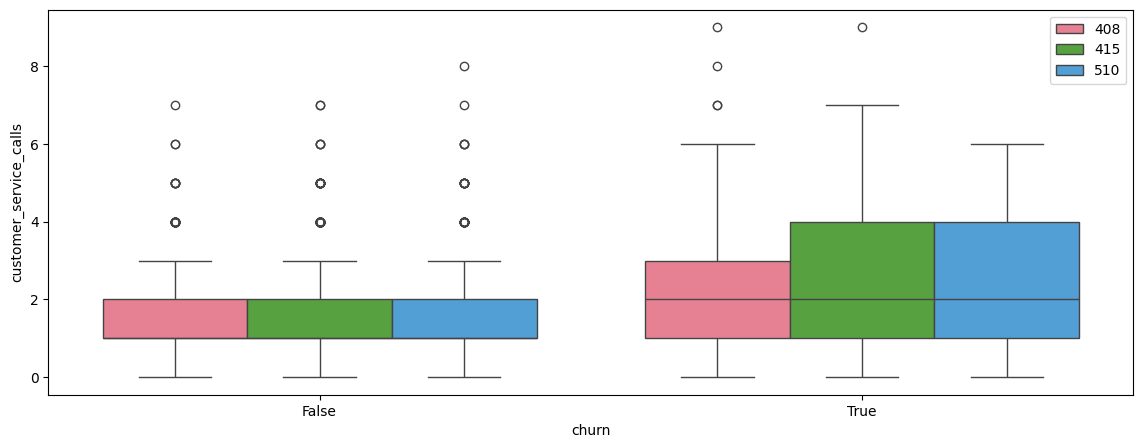

In [ ]:
# Boxplot to see which area code has the highest churn and customer service calls
plt.figure(figsize=(14,5))
palette = sns.color_palette("husl", 3)
sns.boxplot(data=df,x='churn',y='customer_service_calls',hue='area_code', palette=palette);
plt.legend(loc='upper right');

Area code 415 had the highest number of customer service calls made and the highest number of customers who left.

**Data preprocessing**

In [ ]:
# converting all non-numerical values apart from 'state' into categorical
label_encoder = LabelEncoder()

df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])
df['area_code'] = label_encoder.fit_transform(df['area_code'])
df['churn'] = label_encoder.fit_transform(df['churn'])
df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,1,0,1,25.00,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,0
1,107,1,0,1,26.00,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,0
2,137,1,0,0,0.00,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,0
3,84,0,1,0,0.00,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,0
4,75,1,1,0,0.00,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,0,1,36.00,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,0
3329,68,1,0,0,0.00,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,0
3330,28,2,0,0,0.00,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,0
3331,184,2,1,0,0.00,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,0


**Scaling**

This will make the numbers easier to compare by putting them on the same scale.

I used the Min-Max Normalization to adjust the values.

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame
df1 = pd.DataFrame(df1, columns=df.columns)

# Print the first few rows of the scaled dataset
df1.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0.52,0.50,0.00,1.00,0.50,0.76,0.67,0.76,0.54,0.58,0.54,0.60,0.41,0.60,0.50,0.15,0.50,0.11,0.00
1,0.44,0.50,0.00,1.00,0.52,0.46,0.75,0.46,0.54,0.61,0.54,0.62,0.49,0.62,0.69,0.15,0.69,0.11,0.00
2,0.56,0.50,0.00,0.00,0.00,0.69,0.69,0.69,0.33,0.65,0.33,0.37,0.50,0.38,0.61,0.25,0.61,0.00,0.00
3,0.34,0.00,1.00,0.00,0.00,0.85,0.43,0.85,0.17,0.52,0.17,0.47,0.39,0.47,0.33,0.35,0.33,0.22,0.00
4,0.31,0.50,1.00,0.00,0.00,0.48,0.68,0.48,0.41,0.72,0.41,0.44,0.62,0.44,0.51,0.15,0.51,0.33,0.00


In [ ]:
df1.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.00,-0.01,0.02,0.00,-0.01,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
area_code,-0.01,1.00,0.04,0.01,0.01,0.01,-0.01,0.01,0.00,-0.00,0.00,0.01,0.03,0.01,0.00,-0.01,0.00,0.03,0.00
international_plan,0.02,0.04,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02,0.26
voice_mail_plan,0.00,0.01,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02,-0.10
number_vmail_messages,-0.01,0.01,0.01,0.96,1.00,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total_day_minutes,0.01,0.01,0.05,-0.00,-0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total_day_calls,0.04,-0.01,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total_day_charge,0.01,0.01,0.05,-0.00,-0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total_eve_minutes,-0.01,0.00,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total_eve_calls,0.02,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01


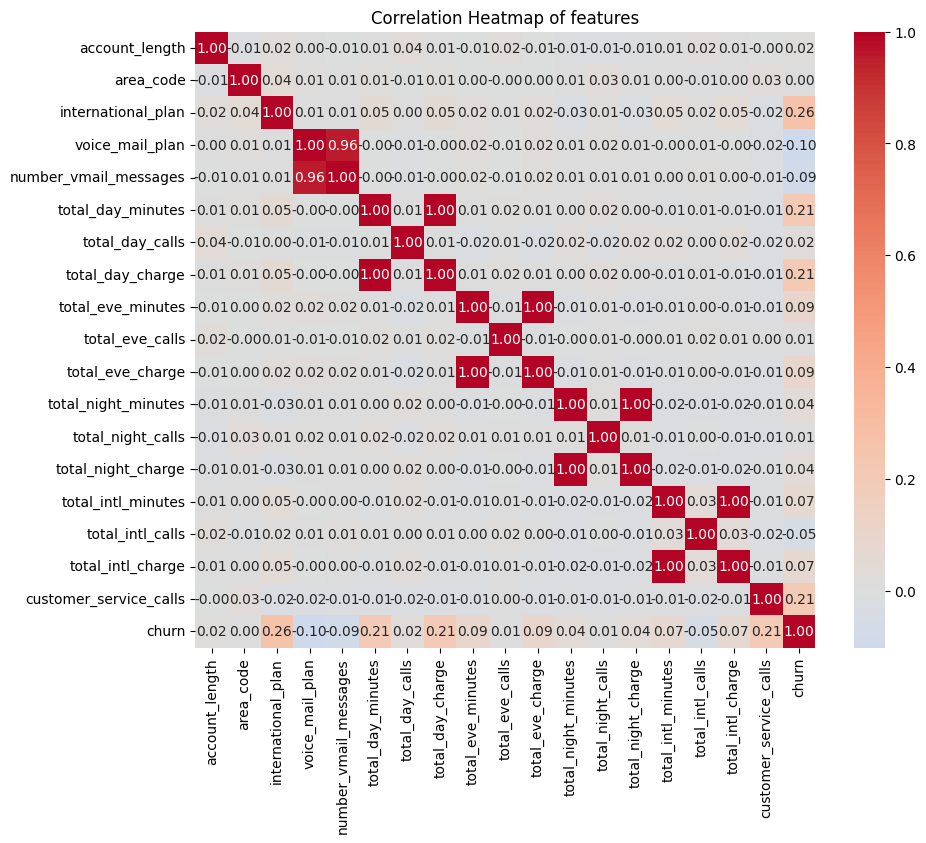

In [ ]:
#Visualising the correlation matrix
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of features')
plt.show()

Some features have no correlation at all.

Some have a perfect positive correlation of one. These include
* `Total day charge` and `total day minutes`
* `Total eve charge` and `total eve minutes`
* `Total night charge` and `total night minutes`
* `Total int charge` and `total int minutes`

This is because the charge on a call depends on how many minutes are spent on the call.


In [ ]:
# Looking at the correlation of the features with 'churn'

df1_corrs = df1.corr()['churn'].map(abs).sort_values(ascending=False)
df1_corrs

churn                    1.00
international_plan       0.26
customer_service_calls   0.21
total_day_minutes        0.21
total_day_charge         0.21
voice_mail_plan          0.10
total_eve_minutes        0.09
total_eve_charge         0.09
number_vmail_messages    0.09
total_intl_charge        0.07
total_intl_minutes       0.07
total_intl_calls         0.05
total_night_charge       0.04
total_night_minutes      0.04
total_day_calls          0.02
account_length           0.02
total_eve_calls          0.01
total_night_calls        0.01
area_code                0.00
Name: churn, dtype: float64

From this we see the features with the highest correlation with churn.
This will help with feature selection.

We start by dropping the columns showing minutes as they have a perfect positive correlation to their corresponding charges.

In [ ]:
df2 = df1.drop(['total_day_minutes', 'total_eve_minutes', 'total_intl_minutes', 'total_night_minutes'], axis=1)
df2

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0.52,0.50,0.00,1.00,0.50,0.67,0.76,0.58,0.54,0.41,0.60,0.15,0.50,0.11,0.00
1,0.44,0.50,0.00,1.00,0.52,0.75,0.46,0.61,0.54,0.49,0.62,0.15,0.69,0.11,0.00
2,0.56,0.50,0.00,0.00,0.00,0.69,0.69,0.65,0.33,0.50,0.38,0.25,0.61,0.00,0.00
3,0.34,0.00,1.00,0.00,0.00,0.43,0.85,0.52,0.17,0.39,0.47,0.35,0.33,0.22,0.00
4,0.31,0.50,1.00,0.00,0.00,0.68,0.48,0.72,0.41,0.62,0.44,0.15,0.51,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.79,0.50,0.00,1.00,0.72,0.47,0.45,0.74,0.59,0.35,0.69,0.30,0.49,0.22,0.00
3329,0.28,0.50,0.00,0.00,0.00,0.35,0.66,0.32,0.42,0.63,0.45,0.20,0.48,0.33,0.00
3330,0.11,1.00,0.00,0.00,0.00,0.66,0.52,0.34,0.79,0.41,0.45,0.30,0.71,0.22,0.00
3331,0.76,1.00,1.00,0.00,0.00,0.64,0.61,0.49,0.44,0.73,0.31,0.50,0.25,0.22,0.00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the independent variables/features
X = df2[['international_plan', 'customer_service_calls', 'total_day_charge',
        'voice_mail_plan', 'total_eve_charge', 'number_vmail_messages',
        'total_intl_charge', 'total_intl_calls', 'total_night_charge',
        'total_day_calls', 'account_length', 'total_eve_calls',
        'total_night_calls', 'area_code']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF for each feature
print(vif_data)


                   Feature   VIF
0       international_plan  1.12
1   customer_service_calls  2.38
2         total_day_charge 11.04
3          voice_mail_plan 16.28
4         total_eve_charge 14.44
5    number_vmail_messages 15.90
6        total_intl_charge 13.01
7         total_intl_calls  4.24
8       total_night_charge 12.09
9          total_day_calls 21.22
10          account_length  7.05
11         total_eve_calls 21.37
12       total_night_calls 11.64
13               area_code  2.96


Features indicating little to no multicollinearity have VIF values close to 1. They are 'international_plan', 'customer_service_calls', and 'total_intl_calls'.


'area_code' has a moderate VIF value of 2.96, suggesting some level of multicollinearity.


Features with VIF values above 5, such as 'total_day_charge', 'voice_mail_plan', 'total_eve_charge', 'number_vmail_messages', 'total_intl_charge', 'total_night_charge', 'total_day_calls', 'account_length', 'total_eve_calls', and 'total_night_calls', indicate significant multicollinearity.

For these, I will merge the columns with charges into one and the ones showing total number of calls as well.




**Train-Test Split**

Splitting data into train and test sets using a test_size of 0.2

In [ ]:
#splitting the data in to train and test sets
X = df2.drop('churn', axis=1)
y = df2['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Dealing with data imbalance**.

There is a clear class imbalance in our target variable since only 14.49% of the users have churned.

**Using SMOTE to Balance the 'Churn' Data**
I applied SMOTE (Synthetic Minority Oversampling Technique), a method used to create more samples of the minority class.

Instead of just copying existing samples, SMOTE generates new, similar samples by blending nearby examples. This helps to balance the dataset and prevent the model from overfitting to the majority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate and apply SMOTE to the training set
smote = SMOTE(random_state=42)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# df_1.to_csv(os.path.join(directory, 'cleaned_H1N1_Flu_Vaccine.csv'), index=False)

# # Make a copy of the cleaned preprocessed data
# data_copy = data_cleaned.copy()
# # Display the first few rows of the copied DataFrame to verify
# print(data_copy.head())

**Modeling**

In this stage, we'll construct a predictive model to forecast customer churn based on dataset features.

Our model's performance will primarily be assessed using the recall score.

Success will be defined by achieving a recall score of 70% or higher.

To meet project objectives, we'll employ the following algorithms:

•	Logistic Regression

•	Decision Tree

•	Random Forest

•	XG Boost

Additionally, we'll assess model performance using the ROC_AUC metric.

Logistic regression

 This a statistical technique applied in binary classification tasks. It operates as a form of regression analysis tailored for scenarios where the dependent variable takes on binary values. The objective of logistic regression is to predict the probability of an instance being assigned to a particular class, leveraging the independent variables' values.

In [ ]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg.fit(resampled_X_train, resampled_y_train)


LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Recall: {recall}")
print()
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Recall: 0.7821782178217822

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       566
         1.0       0.39      0.78      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix:
[[444 122]
 [ 22  79]]


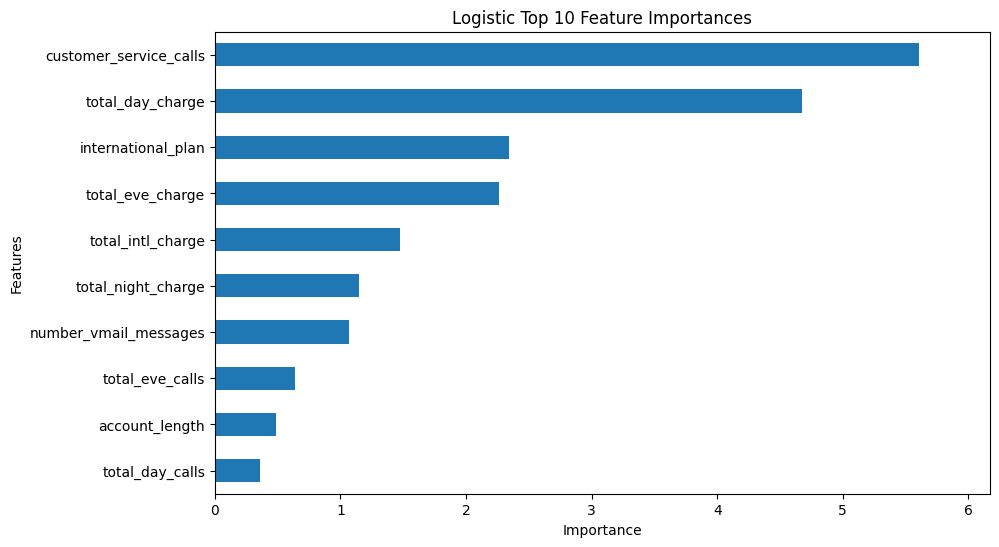

In [ ]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Logistic Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

**Logistic Regression Model Evaluation**

The logistic regression model achieved a recall score of 78, indicating that it correctly identifies about 98% of the actual positive instances.
This is a great performance for a baseline model.

The confusion matrix evaluation revealed that the model has a higher number of true positives and true negatives compared to false positives and false negatives. This means the model is making correct predictions more frequently than incorrect ones and is not overfitting.

The model identified **total day charge, customer service calls, and total eve charge** as the top three most important features.









**Decision Tree Classifier**

This is a supervised machine learning algorithm that can be used to classify data.

Decision trees work by splitting the data into smaller and smaller subsets until each subset contains only data of a single class. The decision tree then predicts the class of a new data point by following the path down the tree that corresponds to the values of its features.

In [ ]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the model
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Recall: {recall}")
print()
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Recall: 0.6831683168316832

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       566
         1.0       0.58      0.68      0.63       101

    accuracy                           0.88       667
   macro avg       0.76      0.80      0.78       667
weighted avg       0.89      0.88      0.88       667

Confusion Matrix:
[[517  49]
 [ 32  69]]


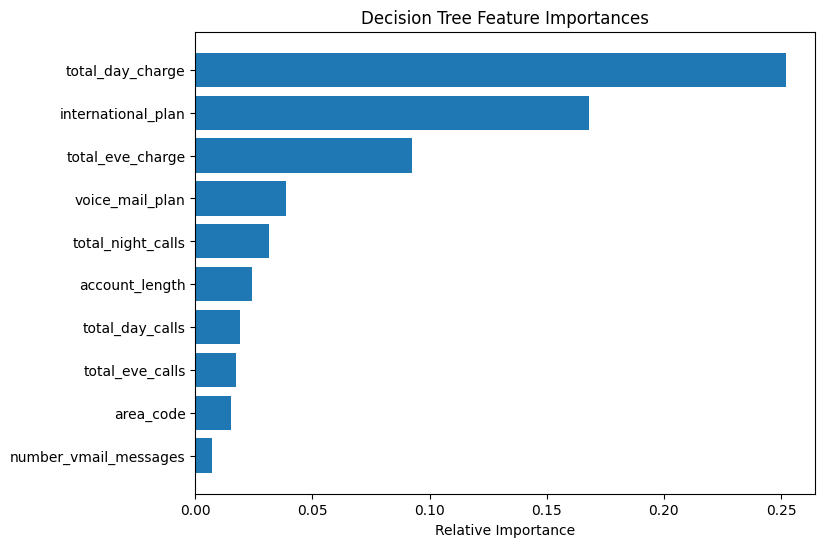

In [ ]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Decision Tree Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The decision tree model has a recall score of 0.68, which is actually good but not better than our baseline model. This means that the model can identify around 68% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.  

According to the model, `total day charge`, `total intl charge`, `total  eve charge` are the top three most important features.

 **Random Forest Classifier**

This is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting a class prediction or regression value by averaging the predictions of the individual trees.

In [ ]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=42)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Recall: {recall}")
print()
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Recall: 0.7821782178217822

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       566
         1.0       0.81      0.78      0.80       101

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.88       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:
[[548  18]
 [ 22  79]]


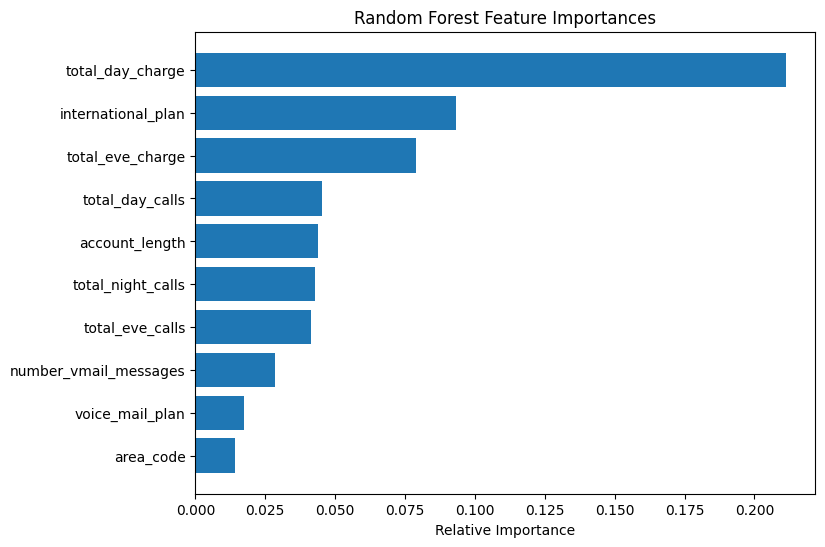

In [ ]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model has a recall score of 0.78, which means that the model can identify around 78% of the actual positive instances correctly.
This is the same as the logistic regression model.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.  

According to the model, `total day charge`, `total intl calls`, `total eve charge` are the top three most important features.

**XGBoost**

XGBoost (Extreme Gradient Boosting) is a highly effective machine learning algorithm used for both regression and classification tasks.

It leverages gradient boosting and ensemble learning techniques to combine multiple weak models, usually decision trees, into a strong predictive model.

In [ ]:
#instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=42)

#Fit on the training data
xg_clf.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred = xg_clf.predict(X_test)

# Evaluate the model
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Recall: {recall}")
print()
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Recall: 0.7821782178217822

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       566
         1.0       0.92      0.78      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667

Confusion Matrix:
[[559   7]
 [ 22  79]]


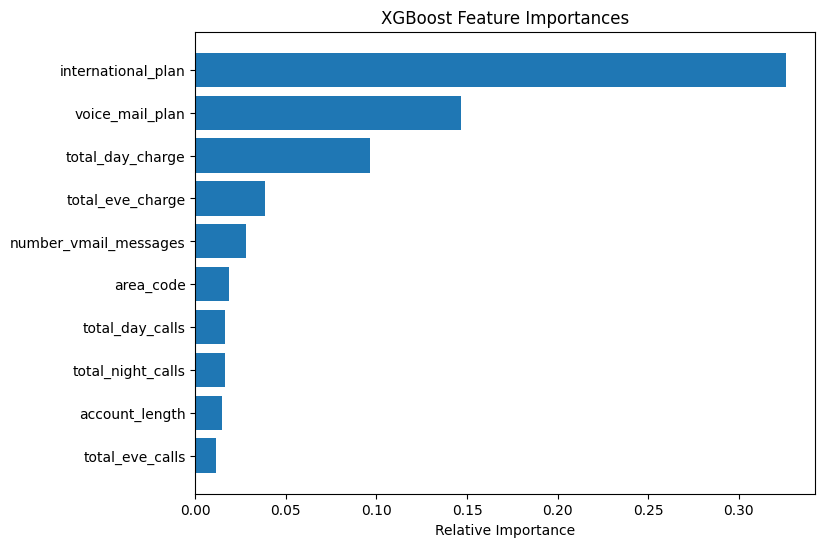

In [ ]:
feature_names = list(resampled_X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('XGBoost Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Comparison of the Models by Recall Score**

The recall score is a measure of how many of the positive instances the model correctly identifies.

A higher recall score indicates that the model is better at identifying positive instances.

In [ ]:
# Define the classifiers
classifiers = [LogisticRegression(random_state=42),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               XGBClassifier(random_state=42)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)

    recall = recall_score(y_test, y_pred)

    # Create a DataFrame with the results and concatenate it with the result_table
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Display the result table
print(result_table)

                        recall
classifiers                   
LogisticRegression        0.78
DecisionTreeClassifier    0.68
RandomForestClassifier    0.78
XGBClassifier             0.78


These recall scores represent the ability of each classifier to correctly identify positive instances (e.g., churn cases) from the dataset.

The Logistic Regression, RandomForestClassifier, and XGBClassifier models achieved the highest recall scores of 0.78, indicating that they effectively captured around 78% of the actual positive instances.

On the other hand, the DecisionTreeClassifier achieved a slightly lower recall score of 0.68.

Overall, the Logistic Regression, RandomForestClassifier, and XGBClassifier models demonstrate strong performance in identifying positive instances, making them promising candidates for further evaluation and deployment in the context of predicting customer churn."

 **Models Comparison - ROC Curve**

The ROC curve is like a graph that tells us how good a binary classifier is.

It shows us how well it finds the right positive cases (true positives) without mistakenly calling negative cases positive (false positives).

The AUC score is the area under this curve, and it tells us overall how good the classifier is.

A higher AUC score means the classifier is better at telling positive from negative cases.

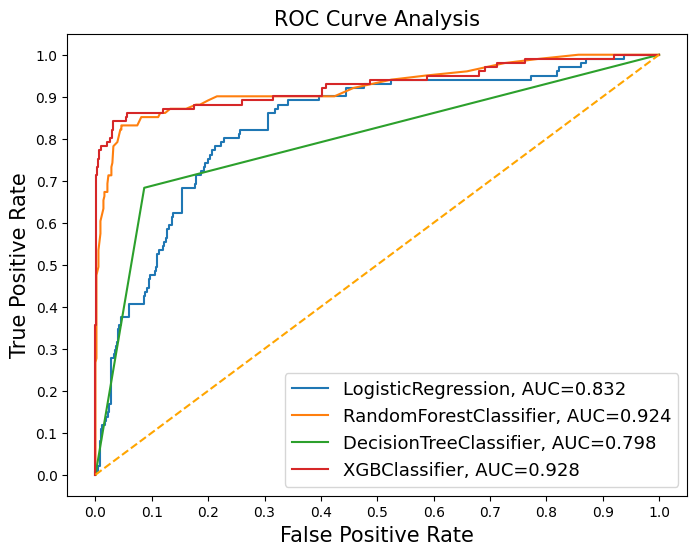

In [ ]:
np.random.seed(42)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Initialize empty lists to store results
classifiers_list = []
fpr_list = []
tpr_list = []
auc_list = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for positive class

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    classifiers_list.append(cls.__class__.__name__)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

# Create a DataFrame from the collected results
result_table = pd.DataFrame({'classifiers': classifiers_list,
                             'fpr': fpr_list,
                             'tpr': tpr_list,
                             'auc': auc_list})

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))
for classifier in result_table.index:
    plt.plot(result_table.loc[classifier]['fpr'],
             result_table.loc[classifier]['tpr'],
             label=f"{classifier}, AUC={result_table.loc[classifier]['auc']:.3f}")

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


In [ ]:
# Create a DataFrame from the collected results
result_table = pd.DataFrame({'classifiers': classifiers_list,
                             'auc': auc_list})

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,auc
classifiers,
LogisticRegression,0.83
RandomForestClassifier,0.92
DecisionTreeClassifier,0.80
XGBClassifier,0.93



These scores represent the accuracy of each classifier in correctly identifying positive instances from the dataset.

The RandomForestClassifier and XGBClassifier achieved the highest scores of 0.92 and 0.93, respectively, indicating they were most effective at identifying positive cases.

The LogisticRegression and DecisionTreeClassifier also performed well with scores of 0.83 and 0.80, respectively.

Overall, all classifiers demonstrated strong performance in identifying positive instances, with the RandomForestClassifier and XGBClassifier showing slightly better performance.

**Model tuning**

After assessing the models using recall scores and ROC AUC, it's evident that both the XGBoost and RandomForest classifiers exhibit promising performance.

To enhance their effectiveness further, we explore model tuning through GridSearch.

In [ ]:
# Tuning XGBoost

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the classifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')

# Perform grid search
grid_search.fit(resampled_X_train, resampled_y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Recall):", best_score)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
Best Score (Recall): 0.9619208031018465


In [ ]:
# Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate=0.2,
                          max_depth=10,
                          n_estimators=100,
                          random_state=42)

# Fit on the training data
xgb_tuned.fit(resampled_X_train, resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred_tuned = xgb_tuned.predict(X_test)

# Evaluate the model
recall_tuned = recall_score(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"Recall: {recall_tuned}")
print()
print("Classification Report:")
print(class_report_tuned)
print("Confusion Matrix:")
print(conf_matrix_tuned)


Recall: 0.7821782178217822

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       566
         1.0       0.85      0.78      0.81       101

    accuracy                           0.95       667
   macro avg       0.91      0.88      0.89       667
weighted avg       0.94      0.95      0.95       667

Confusion Matrix:
[[552  14]
 [ 22  79]]


Next we assess the performance of the tuned XGBoost classifier by plotting the ROC curve and calculating the AUC score based on the predicted probabilities for the positive class.

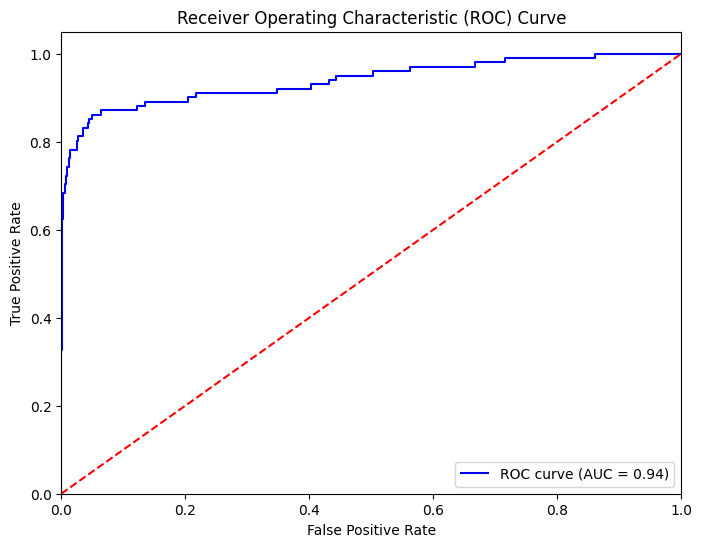

AUC Score: 0.9393170765839834


In [ ]:
# Get the predicted probabilities for the positive class
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", auc_score)


AUC (Area Under the Curve) score of 0.939 indicates excellent performance of the tuned XGBoost classifier in distinguishing between positive and negative classes.

This score suggests that the classifier has a high true positive rate while maintaining a low false positive rate across different thresholds.

The recall score however, did not improve. It remained at 0.78

**Tuning RandomForest**



In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall')

# Perform grid search
grid_search_rf.fit(resampled_X_train, resampled_y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters (Random Forest):", best_params_rf)
print("Best Score (Recall) (Random Forest):", best_score_rf)


Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (Recall) (Random Forest): 0.8988636799877154


In [ ]:
# Create an instance of RandomForest Classifier with best params
rf_tuned = RandomForestClassifier(max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   n_estimators=50,
                                   random_state=42)

# Fit on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_tuned = rf_tuned.predict(X_test)

# Evaluate the model
recall_tuned = recall_score(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"Recall: {recall_tuned}")
print()
print("Classification Report:")
print(class_report_tuned)
print("Confusion Matrix:")
print(conf_matrix_tuned)

Recall: 0.8118811881188119

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       566
         1.0       0.75      0.81      0.78       101

    accuracy                           0.93       667
   macro avg       0.86      0.88      0.87       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
[[539  27]
 [ 19  82]]


Now we assess the performance of the tuned RandomForest classifier by plotting the ROC curve and calculating the AUC score based on the predicted probabilities for the positive class.

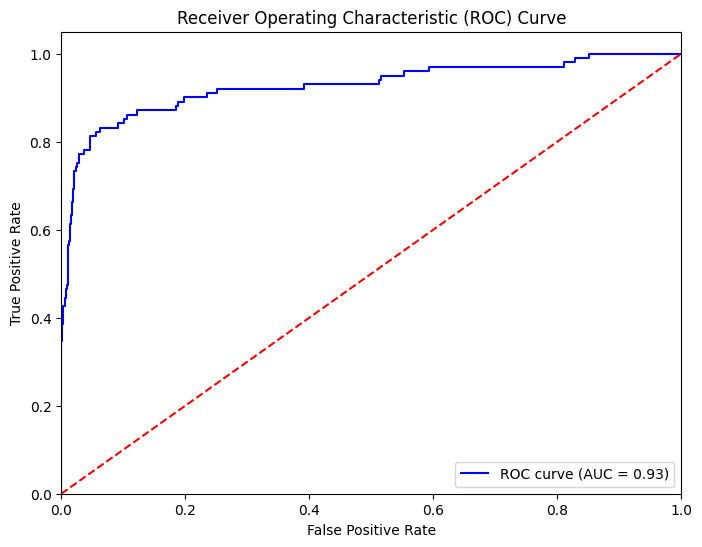

AUC Score: 0.9269145995871673


In [ ]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", auc_score)


The model achieved an impressive AUC score of approximately 0.93, indicating its strong ability to distinguish between churners and non-churners.

This suggests reliable predictions with a high discrimination between positive and negative instances.

Additionally, the model's recall score improved from 0.78 to 0.81 after tuning, signifying better identification of actual churn cases.

Overall, the high AUC score and improved recall highlight the model's effectiveness in predicting churn and its potential for informing targeted customer retention strategies, making it valuable for proactive customer management.

**Model selection**

Based on the ROC curve and the recall metric, the tuned RandomForest performs a bit better than XGBoost model  in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.
The model has a recall score of 0.81, which means model is able to capture 81% of the actual churned customers.

This is above our target recall score of 0.8.

Next we use this model to determine the importance of features.

In [ ]:
# We assign values to the features according to importance.

# Extract feature importances
feature_importances = rf_tuned.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': resampled_X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                   Feature  Importance
6         total_day_charge        0.24
13  customer_service_calls        0.20
2       international_plan        0.11
11        total_intl_calls        0.09
8         total_eve_charge        0.08
12       total_intl_charge        0.05
10      total_night_charge        0.05
0           account_length        0.03
5          total_day_calls        0.03
7          total_eve_calls        0.03
9        total_night_calls        0.03
4    number_vmail_messages        0.03
3          voice_mail_plan        0.02
1                area_code        0.01


This table displays the feature importance scores generated by the tuned random forest model. Each row represents a feature, and the corresponding importance score indicates the relative contribution of that feature to the model's predictive performance.

**total_day_charge**
This feature has the highest importance score of 0.24, indicating that it plays a significant role in predicting the target variable. Higher values of total_day_charge likely have a stronger influence on the model's predictions.

**customer_service_calls**
With an importance score of 0.20, this feature is also highly influential. It suggests that the number of customer service calls made by customers could strongly impact their likelihood of churn.

**international_plan**
This feature has an importance score of 0.11, indicating its moderate influence on the model's predictions. Customers with or without an international calling plan may exhibit distinct patterns that contribute to churn prediction.

**total_intl_calls** **total_eve_charge**, **total_intl_charge**, **total_night_charge**, **account_length**, **total_day_calls**, **total_eve_calls, total_night_calls, number_vmail_messages**:

These features have importance scores ranging from 0.03 to 0.05, suggesting a relatively lower but still noticeable impact on the model's predictions.

**voice_mail_plan, area_code**
These features have lower importance scores of 0.02 and 0.01, respectively, indicating a comparatively weaker influence on the model's predictions.

In summary, the feature importance scores provide insights into which features are most relevant for predicting churn in the dataset, helping to prioritize feature selection and guide further analysis or model refinement efforts.

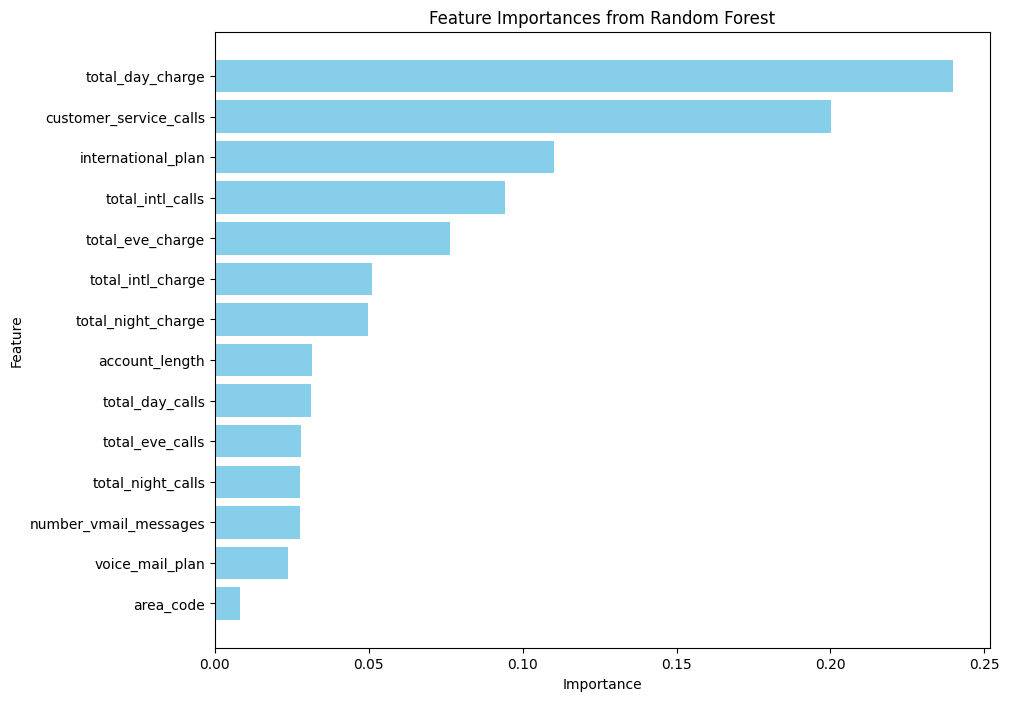

In [ ]:
#Visual representation of feature importance

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

These top features show the potential drivers of churn within the customer base.

Total day charge, international plan and total evening charge carry weight


**Conclusion**

The recall score of our RandomForest classifier was 81%.

This is a good predictive model that achieved the target recall score.

We achieved our objectives to be able to predict customer churn as well as the recall score.



# **Recommendations**

# **Based on the Total day charge**

'Total day charge' is the most significant predictor of customer churn for SyriaTel.
Going by this factor, here are the recommendations.

**Review Pricing:**
Ensure daytime charges are competitive.
Introduce flexible pricing plans with lower daytime rates for high-usage customers.

**Promotional Offers:**
Offer discounts on daytime charges for high-risk customers.

**Customer Communication:**Suggest better plans based on usage patterns.

**Provide clear billing:** information to prevent frustration.

**Customer Feedback:**Collect feedback on daytime charges to guide pricing adjustments.

**Usage Monitoring:**Implement alerts for customers nearing higher charge brackets.

#**Recommendations Based on the Influence of the International Plan Feature:**

**Customized International Plans:** Offer tailored international plans based on usage patterns and customer preferences.
Provide flexible options such as pay-per-use or discounted rates for frequent international callers.

**Promotional Offers:** Introduce promotional deals or discounts on international calls to incentivize usage and retain customers.

**Customer Support:** Offer dedicated customer support for international plan inquiries and issues.
Provide assistance in selecting the most suitable international plan based on individual needs.

**Market Analysis:** Conduct market analysis to stay updated on competitors' international plan offerings and pricing strategies.
Adjust international plan features and pricing to remain competitive in the market.


#**Recommendations Based on the Influence of the Total Evening Charge Feature:**

**Flexible Pricing Plans:** Offer flexible pricing plans for evening usage, such as discounted rates during off-peak hours or bundled evening packages.

**Promotional Packages:** Introduce promotional packages or incentives for evening usage, such as free evening minutes or bonus data for evening internet usage.

**Usage Alerts:**
Implement usage alerts to notify customers when they are approaching their evening usage limits or exceeding their allocated evening minutes.

**Personalized Recommendations:** Offer personalized recommendations to customers based on their usage patterns and preferences, suggesting plans that align with their evening usage habits.



Overall, a **Feedback Mechanism** need to be established.
The feedback mechanism to gather insights from customers about their usage experiences and preferences.
The customer feedback can be used to refine pricing plans and subscription plans as well as introduce new features that cater to their needs.

